In [82]:
# TODO: are min and max gate voltages fine at -10 and 10?
# TODO: what is diff of srs 830 vs 810? figure out which to get the phase from
# TODO: how many steps and what delay time for keithley?
# TODO: check initami
# TODO: is the ramp rate correct for ami; i just used the max
# TODO: do i need the [1] after readami inside lockin_iv_ami
# TODO: how long to wait between taking measurements of ami--aka, how many data points needed
# TODO: how to set whether srs is measuring current or voltage or should i just set this manually
# TODO: will get delay from cameron--prob like 3 seconds.  then determine number of voltage steps.

# %run lockin_iv.ipynb
%run lockin_iv_keithley2.ipynb
%run lockin_iv_ami.ipynb
# %run k2400.ipynb
%run ami420.ipynb
%run srs.ipynb
%run fileio.ipynb
%run hp603.ipynb

In [80]:
# ami420=initami('GPIB1::22::INSTR') # init ami on GPIB addr 22
srxx=initsrs('GPIB0::8::INSTR') # init srs on GPIB addr 8
srxy = srxx
srcurrent = srxx
# srxy=initsrs('GPIB0::10::INSTR') # init srs on GPIB addr 20
# srcurrent=initsrs('GPIB0::11::INSTR') # init srs on GPIB addr 20
k2400=init2400('GPIB0::3::INSTR') # init k2400 on GPIB addr 3
ami = initami('GPIB0::22::INSTR')
hp = inithp('GPIB0::21::INSTR')

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1199539,C30   Mar 17 2006 09:29:29/A02  /K/J



In [3]:
np.linspace(0,1,51)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

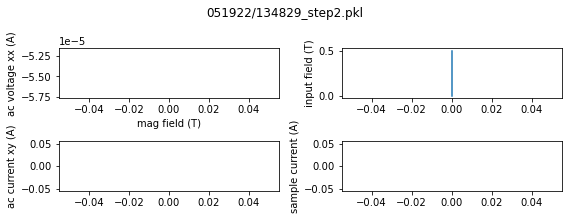

In [85]:
# Sweep gate voltage (from Vmin = -10 V to Vmax = 10 V) and record Rxx, Rxy. Stay at Vg=Vmax. (See Fig 3a from Dean2010). Ramp speed: 0.02 V/sec
# step1 = lockin_iv_keithley(k2400,srxx,srxy,srcurrent,np.linspace(-1,1,51),0.5,1) #how many steps, what delay time
                                                              
# # While Vg=Vmax, sweep the magnetic field from Bmin = 0 T to Bmax = 5 T. We should see a typical QHE plot for Rxx, Rxy. 
# ACTUAL RAMP RATE: 0.032

# step2 = lockin_iv_ami(ami,srxx,srxy,srcurrent,0,1,,0.5,2)

ami.write('CONF:COIL 1')
ami.write('CONF:STAB 98')
step2 = lockin_iv_ami(ami,srxx,srxy,srcurrent,0,0.5,0.1,0.5,2)


# # Go from V = Vmax to V = Vmin while staying at B = Bmax. We expect to see steps in Rxy that correspond to crossing of n=1,0,-1 LLs
# step1 = lockin_iv_keithley(k2400,srxx,srxy,srcurrent,np.linspace(10,-10,steps,delay,1)) #how many steps, what delay time
                                                                       
# # Sweep from B = Bmax to B = 0 while at V = Vmin. We expect to see Rxy(-B) = -Rxy(B), Rxx(-B)=Rxx(B) according to Onsager relations.                                                                 
# step4 = lockin_iv_ami(ami420,srsxx,srsxy,srscurrent,5,0,0.032, delay, 4)



In [8]:
ami.query("*IDN?")

'AMERICAN MAGNETICS INC.,MODEL 420,1.31b\n'

In [5]:
sweep2400(k2400,0)

In [16]:
ami.query_ascii_values('FIELD:MAG?')

[0.0]

In [70]:
rampami(0.5, 0.1)

In [66]:
ami.write('CONF:COIL 1')

13

In [68]:
ami.query_ascii_values('COIL?')

[1.0]

In [65]:
ami.write('CONF:STAB 98')

14

In [73]:
[0][1]

IndexError: list index out of range

In [81]:
readami(ami)

0.0

In [77]:
readami(ami)[0]

0.0

In [78]:
readami(ami)[1]

IndexError: list index out of range